# Network Intrusion Detection with Deep Learning



menggunakan AE dengan pretraining AE di hidden layer dan DNN fine-tuning

In [0]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/cids2018")
#!ls

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Open Data

In [0]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [0]:
my_file =  '10data2.npy'
train,test,y_train,y_test,ylabel_train, ylabel_test = load_matrices(my_file)

## The Model

In [0]:
from keras.callbacks import EarlyStopping
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Activation
from keras.activations import elu
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from time import time


In [4]:
from keras.callbacks import ModelCheckpoint
filepath="./logae/2tes_b.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Using TensorFlow backend.


In [0]:
# We use early stopping on a holdout validation set

In [0]:
from keras.layers.advanced_activations import LeakyReLU
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'


In [16]:
# layer 1
input_dim = train.shape[1]
input_ly_1= Input(shape=(input_dim,))
enc_ly_1= Dense(25, activation=LR, kernel_initializer='lecun_uniform')(input_ly_1)
dec_ly_1=Dense(input_dim, activation='sigmoid', kernel_initializer='lecun_uniform')(enc_ly_1)

auto_ly_1= Model(input_ly_1, dec_ly_1)
encoder_ly_1= Model(input_ly_1, enc_ly_1)
auto_ly_1.summary()


t0 = time()
auto_ly_1.compile(loss='mse',optimizer='adam', metrics=['accuracy']) # reporting the loss

auto_ly_1.fit(train,train,
      epochs=20,
      batch_size=256,
      shuffle=True,
      callbacks=callbacks_list,                    
      #callbacks=[early_stopping])
      #validation_data=(test,test))
      validation_split=0)   
  
tt = time()-t0
print ("FEATURE EXTRACTION in {} seconds".format(round(tt,3)))
# if you want an encoded flatten representation of every test MNIST


ly1_predict= encoder_ly_1.predict(train)
print(ly1_predict.shape)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2025      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                2080      
Total params: 4,105
Trainable params: 4,105
Non-trainable params: 0
_________________________________________________________________




/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))




Epoch 1/20





1619315/1619315 [==============================] - 28s 17us/step - loss: 0.0050 - acc: 0.2458
Epoch 2/20
    256/1619315 [..............................] - ETA: 15:52 - loss: 1.0594e-04 - acc: 0.3008

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1619315/1619315 [==============================] - 20s 12us/step - loss: 9.0201e-05 - acc: 0.3041
Epoch 3/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 5.0448e-05 - acc: 0.3057
Epoch 4/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 3.7578e-05 - acc: 0.3444
Epoch 5/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 3.4563e-05 - acc: 0.3272
Epoch 6/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 3.2786e-05 - acc: 0.3493
Epoch 7/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 3.1560e-05 - acc: 0.3433
Epoch 8/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 3.0699e-05 - acc: 0.3456
Epoch 9/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 3.0037e-05 - acc: 0.3295
Epoch 10/20
1619315/1619315 [==============================] - 20s 12us/step - loss: 2.9511e-05 - acc: 0.3237
Epoch 11/20
1619315/1619315 [

In [0]:
filepath2="./logae/7weights_tes_2a.best.hdf5"
checkpoint2 = ModelCheckpoint(filepath2, monitor='acc', save_best_only=True, mode='max')
callbacks_list2 = [checkpoint2]

From Introduction to Neural Networks for Java (second edition) by Jeff Heaton - preview freely available at Google Books and previously at author's website:

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

    The number of hidden neurons should be between the size of the input layer and the size of the output layer.
    The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
    The number of hidden neurons should be less than twice the size of the input layer.

• Number of hidden nodes: There is no magic formula for selecting the optimum number of hidden neurons. However, some thumb rules are available for calculating the number of hidden neurons. A rough approximation can be obtained by the geometric pyramid rule proposed by Masters (1993). For a three layer network with n input and m output neurons, the hidden layer would have √(n*m) neurons.

Ref:

1 Masters, Timothy. Practical neural network recipes in C++. Morgan Kaufmann, 1993. 

In [18]:
###DNN



# Deep stacked auto encoder
ly_1= auto_ly_1.layers[1].get_weights()
#ly_2= auto_ly_2.layers[1].get_weights()
#ly_3= auto_ly_3.layers[1].get_weights()

input_da= Input(shape=(input_dim,))
dnn_1=Dense(25, activation=LR,  kernel_initializer='lecun_uniform',input_shape=(input_dim,),
            name="layer1")(input_da)
dnn_2= Dense(20, activation=LR, kernel_initializer='lecun_uniform',name="layer2")(dnn_1)
dnn_3= Dense(20, activation=LR, kernel_initializer='lecun_uniform',name="layer3")(dnn_2)
dnn_4= Dense(20, activation=LR, kernel_initializer='lecun_uniform',name="layer4")(dnn_3)
dnn_5= Dense(15, activation='softmax',kernel_initializer='lecun_uniform')(dnn_4)

dnn= Model(input_da, dnn_5)
dnn.summary()

dnn.layers[1].set_weights(ly_1) # first dense layer
#dnn.layers[2].set_weights(ly_2)
#dnn.layers[3].set_weights(ly_3)


#######################################

t1=time()
dnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],
            optimizer= Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0, amsgrad=False))
history2a=dnn.fit(train, ylabel_train,epochs=200,batch_size=256,shuffle=True,verbose=1, 
                    callbacks=callbacks_list2, 
                      validation_split=0)
                     #validation_data=(test,y_test))
tt2 = time()-t1
print ("FEATURE CLASSIFICATION in {} seconds".format(round(tt2,3)))






Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80)                0         
_________________________________________________________________
layer1 (Dense)               (None, 25)                2025      
_________________________________________________________________
layer2 (Dense)               (None, 20)                520       
_________________________________________________________________
layer3 (Dense)               (None, 20)                420       
_________________________________________________________________
layer4 (Dense)               (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
Total params: 3,700
Trainable params: 3,700
Non-trainable params: 0
_________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
1619315/1619315 [==============================] - 28s 17us/step - loss: 0.1784 - acc: 0.9443
Epoch 2/200
1619315/1619315 [==============================] - 27s 17us/step - loss: 0.1536 - acc: 0.9509
Epoch 3/200
1619315/1619315 [==============================] - 27s 17us/step - loss: 0.3236 - acc: 0.9405
Epoch 4/200
1619315/1619315 [==============================] - 28s 17us/step - loss: 0.1540 - acc: 0.9512
Epoch 5/200
1619315/1619315 [==============================] - 27s 17us/step - loss: 0.1550 - acc: 0.9515
Epoch 6/200
1619315/1619315 [==============================] - 28s 17us/step - loss: 0.1534 - acc: 0.9518
Epoch 7/200
1619315/1619315 [==============================] - 28s 17us/step - loss: 0.1537 - acc: 0.9518
Epoch 8/200
1619315/1619315 [==============================] - 27s 17us/step - loss: 0.1689 - acc: 0.9500
Epoch 9/200
1619315/1619315 [=============================

In [21]:
import joblib
# save the model to disk
filename = './logae/ae_dnn_model.sav'
joblib.dump(dnn, filename)

['./logae/ae_dnn_model.sav']

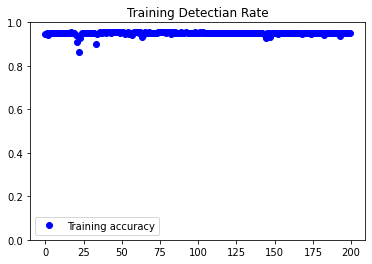

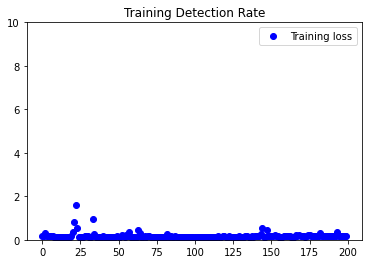

In [26]:
accuracy_2a = history2a.history['acc']
#val_accuracy_2a = history2a.history['val_accuracy']
loss_2a = history2a.history['loss']
#val_loss_2a = history2a.history['val_loss']
epochs = range(len(accuracy_2a))
plt.plot(epochs, accuracy_2a, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy_2a, 'b', label='Test accuracy')
plt.ylim(bottom=0, top=1.0)  # this line
plt.title('Training Detectian Rate')
plt.legend()
plt.figure()
plt.plot(epochs, loss_2a, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_2a, 'b', label='Test loss')
plt.ylim(bottom=0, top=10.0)  # this line
plt.title('Training Detection Rate')
plt.legend()
plt.show()

In [27]:
dnn.evaluate(test,ylabel_test)

404836/404836 [==============================] - 14s 35us/step


[0.1542649475393717, 0.9544655119603987]

In [28]:
# 4. evaluate the network
loss, val_accuracy = dnn.evaluate(train,ylabel_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, val_accuracy*100))

1619315/1619315 [==============================] - 55s 34us/step

Loss: 0.15, Accuracy: 95.43%


In [29]:
# 4. evaluate the network
loss, val_accuracy = dnn.evaluate(test,ylabel_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, val_accuracy*100))

404836/404836 [==============================] - 14s 34us/step

Loss: 0.15, Accuracy: 95.45%


## The Performance

In [0]:
from sklearn.metrics import confusion_matrix


In [31]:
##loading autoencoder untuk data tes
# load weights
dnn.load_weights(filepath2)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")
scores = dnn.evaluate(test, ylabel_test, verbose=0)
print("%s: %.2f%%" % (dnn.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
acc: 95.51%


In [32]:
scores = dnn.evaluate(train, ylabel_train, verbose=0)
print("%s: %.2f%%" % (dnn.metrics_names[1], scores[1]*100))



acc: 95.49%


In [0]:
preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_train, axis=1)
# With the confusion matrix, we can aggregate model predictions
# This helps to understand the mistakes and refine the model

In [0]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix


In [36]:
confusion_matrix(true_lbls, pred_lbls)

array([[798606,     77,     47,      0,      5,      0,    485,     24,
            12,      5,    109,      9,   3634,      0,     12],
       [    19,  85823,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [   250,      0,    230,      0,      0,      0,     16,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    92,      0,      1,     88,      0,      0,      6,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0, 192098,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     9,      3,      0,      0,      0,   1350,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    41,      0,      0,      0,      0,    170, 161236,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  

In [37]:
from sklearn.metrics import f1_score
f1_score(true_lbls, pred_lbls, average='weighted')

0.9466577892813648

In [0]:
# Overall, we report similar model performance to the reference above.
# Their research suggest using unsupervised pretraining with autoencoders over
# both train and test before adding classifier layers for fine-tuning.
# I have done no parameter tuning but report comparable performance.
# Note the model has diffuculty with U2R and R2L.

In [39]:
from sklearn.metrics import classification_report
outcomes = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
'DDOS attack-HOIC','DDOS attack-LOIC-UDP','DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris',
'FTP-BruteForce','Infilteration','SQL Injection','SSH-Bruteforce' ]
class_names=outcomes

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Benign    0.95352   0.99450   0.97358    803025
                     Bot    0.99906   0.99978   0.99942     85842
        Brute Force -Web    0.80139   0.46371   0.58748       496
        Brute Force -XSS    0.98876   0.47059   0.63768       187
        DDOS attack-HOIC    0.99997   1.00000   0.99999    192098
    DDOS attack-LOIC-UDP    0.88816   0.99119   0.93685      1362
  DDoS attacks-LOIC-HTTP    0.99666   0.99869   0.99768    161447
   DoS attacks-GoldenEye    0.99748   0.99904   0.99826     25008
        DoS attacks-Hulk    0.99977   0.99970   0.99973    138459
DoS attacks-SlowHTTPTest    0.74963   0.45111   0.56327     41974
   DoS attacks-Slowloris    0.98014   0.99259   0.98632      6612
          FTP-BruteForce    0.69174   0.89128   0.77893     58055
           Infilteration    0.73058   0.20382   0.31872     48347
           SQL Injection    0.00000   0.00000   0.00000        71
         

In [40]:
class_names

['Benign',
 'Bot',
 'Brute Force -Web',
 'Brute Force -XSS',
 'DDOS attack-HOIC',
 'DDOS attack-LOIC-UDP',
 'DDoS attacks-LOIC-HTTP',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'FTP-BruteForce',
 'Infilteration',
 'SQL Injection',
 'SSH-Bruteforce']

Confusion matrix, without normalization
[[798606     77     47      0      5      0    485     24     12      5
     109      9   3634      0     12]
 [    19  85823      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   250      0    230      0      0      0     16      0      0      0
       0      0      0      0      0]
 [    92      0      1     88      0      0      6      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 192098      0      0      0      0      0
       0      0      0      0      0]
 [     9      3      0      0      0   1350      0      0      0      0
       0      0      0      0      0]
 [    41      0      0      0      0    170 161236      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0  24984      8      0
      16      0      0      0      0]
 [     7      0      0      0      0      0      0     35 138417      0
       0

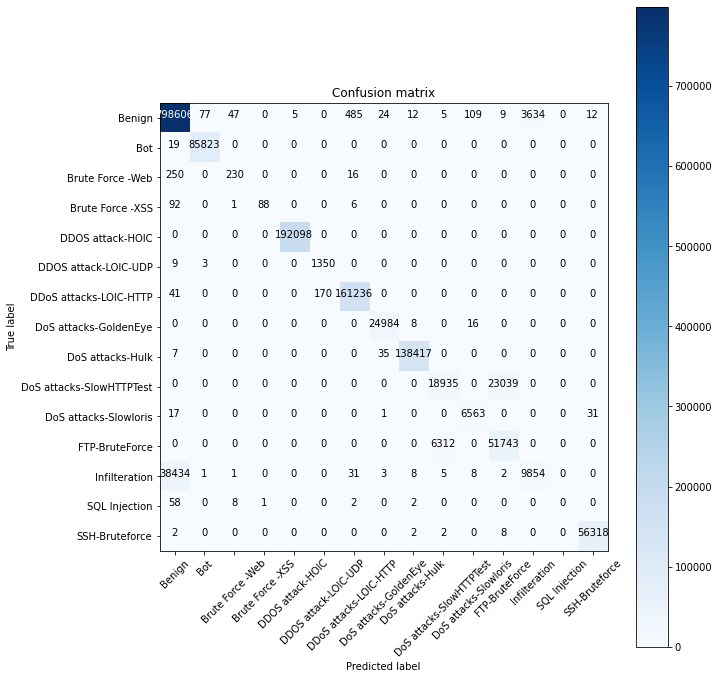

In [41]:

#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes


results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

# Data Test

In [42]:
##loading autoencoder untuk data tes
# load weights
dnn.load_weights(filepath2)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")
scores = dnn.evaluate(test, ylabel_test, verbose=0)
print("%s: %.2f%%" % (dnn.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
acc: 95.51%


In [43]:
scores = dnn.evaluate(test, ylabel_test, verbose=0)
print("%s: %.2f%%" % (dnn.metrics_names[1], scores[1]*100))

acc: 95.51%


In [0]:
preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)
# With the confusion matrix, we can aggregate model predictions
# This helps to understand the mistakes and refine the model

In [45]:
confusion_matrix(true_lbls, pred_lbls)

array([[200036,     35,      8,      0,      1,      0,    137,     10,
             2,      1,     34,      3,    969,      0,      2],
       [     7,  21472,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    67,      0,     45,      0,      0,      0,      3,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    22,      0,      0,     21,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  48006,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      2,      0,      0,      0,    362,      0,      0,
             1,      0,      0,      0,      0,      0,      0],
       [    15,      0,      0,      0,      0,     62,  40142,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  

In [46]:

class_names=outcomes

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Benign    0.95438   0.99403   0.97380    201238
                     Bot    0.99828   0.99967   0.99898     21479
        Brute Force -Web    0.78947   0.39130   0.52326       115
        Brute Force -XSS    0.95455   0.48837   0.64615        43
        DDOS attack-HOIC    0.99998   1.00000   0.99999     48006
    DDOS attack-LOIC-UDP    0.85377   0.98370   0.91414       368
  DDoS attacks-LOIC-HTTP    0.99633   0.99809   0.99721     40219
   DoS attacks-GoldenEye    0.99658   0.99935   0.99796      6123
        DoS attacks-Hulk    0.99980   0.99957   0.99968     34758
DoS attacks-SlowHTTPTest    0.75210   0.45288   0.56534     10484
   DoS attacks-Slowloris    0.97711   0.99509   0.98602      1630
          FTP-BruteForce    0.69188   0.89185   0.77924     14452
           Infilteration    0.71683   0.20627   0.32036     11892
           SQL Injection    0.00000   0.00000   0.00000        16
         

Confusion matrix, without normalization
[[200036     35      8      0      1      0    137     10      2      1
      34      3    969      0      2]
 [     7  21472      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    67      0     45      0      0      0      3      0      0      0
       0      0      0      0      0]
 [    22      0      0     21      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  48006      0      0      0      0      0
       0      0      0      0      0]
 [     3      2      0      0      0    362      0      0      1      0
       0      0      0      0      0]
 [    15      0      0      0      0     62  40142      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0   6119      2      0
       2      0      0      0      0]
 [     5      0      0      0      0      0      0     10  34743      0
       0

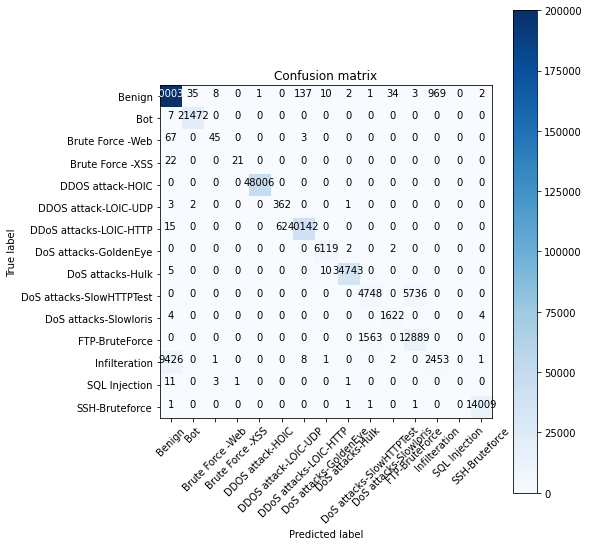

In [47]:



results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))